**Problem Statement:**  
Demand forecasts are fundamental to plan and deliver products and services. Accurate forecasting of demand can help the manufacturers to maintain appropriate stock which results in reduction in loss due to product not being sold and also reduces the opportunity cost (i.e. higher demand but less availability => opportunity lost). Despite such relevance, manufacturers have difficulty choosing which forecast model is the best for their use case. In this project, historical sales data corresponding to multiple(25) items sold in 10 stores are provided and we are expected to come up with a best model to predict the future demand for products which results in maximum profit for the manufacturer. Predict the demand for the next 3 months at the item level (i.e. all the stores combined).

**Data:**
 The item, store and sales details are provided at the daily level for a period spanning 4 years.

## Import Libraries

In [17]:
! pip install pandas-profiling

In [18]:
import warnings

# Suppress a specific warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics

## Read the Data

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/karanpk02/DATA-SCIENCE-PROJECT-1/main/train%202.csv")

In [21]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [22]:
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


## Analyze the Data

## Data Profiling

In [23]:
# profile = ProfileReport(df)
# profile.to_file(r"C:\Users\P.Ravalika\Desktop\DemandForcasting_profile_report.excel")

In [24]:
df.shape

(913000, 4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [26]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [27]:
df['date'] = pd.to_datetime(df['date'],format = "%Y-%m-%d")

In [28]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
store,913000.0,5.500000,2.872283,1.0,3.0,5.5,8.0,10.0
item,913000.0,25.500000,14.430878,1.0,13.0,25.5,38.0,50.0
sales,913000.0,52.250287,28.801144,0.0,30.0,47.0,70.0,231.0


In [30]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [31]:
df=df.drop_duplicates()

In [32]:
df.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [33]:
print(df['store'].unique())
print(df['item'].unique())

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [34]:
df['date'].agg(['min', 'max'])

min   2013-01-01
max   2017-12-31
Name: date, dtype: datetime64[ns]

In [35]:
df[df['date']=='2013-01-01']

,date,store,item,sales
0,2013-01-01,1,1,13
1826,2013-01-01,2,1,12
3652,2013-01-01,3,1,19
5478,2013-01-01,4,1,10
7304,2013-01-01,5,1,11
...,...,...,...,...
903870,2013-01-01,6,50,20
905696,2013-01-01,7,50,21
907522,2013-01-01,8,50,45
909348,2013-01-01,9,50,36


## EDA 1 - Exploratory Data Analysis





## Year Wise Sales

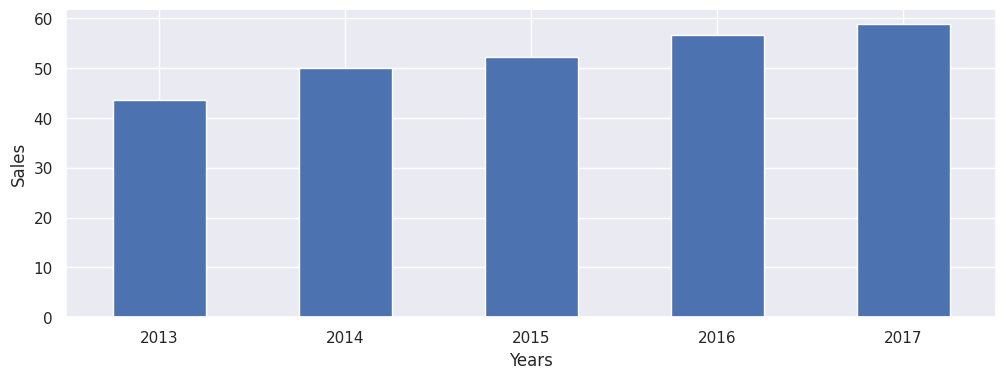

In [36]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["date"].dt.year)["sales"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Years");  # custom x label using Matplotlib
plt.ylabel("Sales");
#df.groupby(df["date"].dt.year)["sales"].mean()

## Month wise Sales

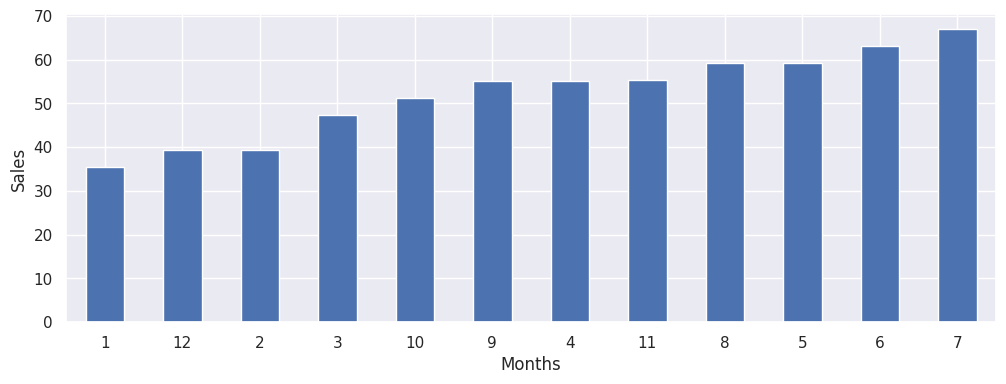

In [37]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["date"].dt.month)["sales"].mean().sort_values(ascending=True).plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Months");  # custom x label using Matplotlib
plt.ylabel("Sales");
# df.groupby(df["date"].dt.month)["sales"].mean()

## Similary we have some days of the week like sunday, monday, tuesday, wednesday, thursday, friday and saturday sales relations. Now we are going to identify such relations also.

In [38]:
df['week_days'] = df['date'].dt.day_name()

In [39]:
df = df[['date', 'week_days', 'store', 'item', 'sales']]

In [40]:
df.head()

,date,week_days,store,item,sales
0,2013-01-01,Tuesday,1,1,13
1,2013-01-02,Wednesday,1,1,11
2,2013-01-03,Thursday,1,1,14
3,2013-01-04,Friday,1,1,13
4,2013-01-05,Saturday,1,1,10


## Day Wise Sales

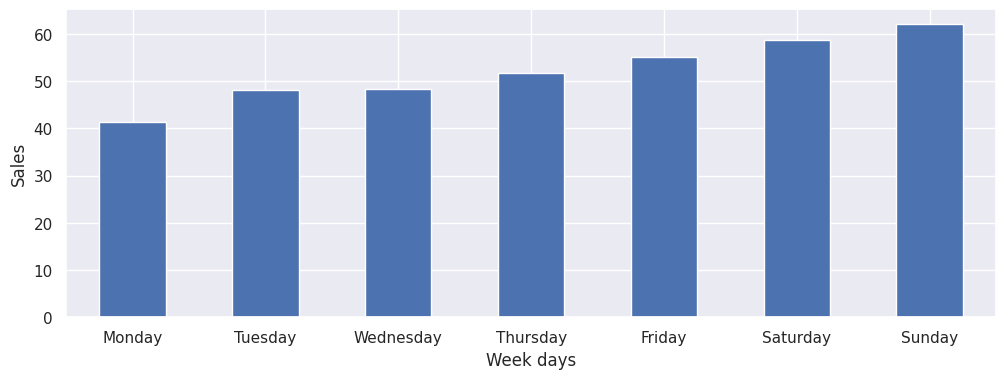

In [41]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["week_days"])["sales"].mean().sort_values(ascending=True).plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Week days");  # custom x label using Matplotlib
plt.ylabel("Sales");

## Average Sales of Each store

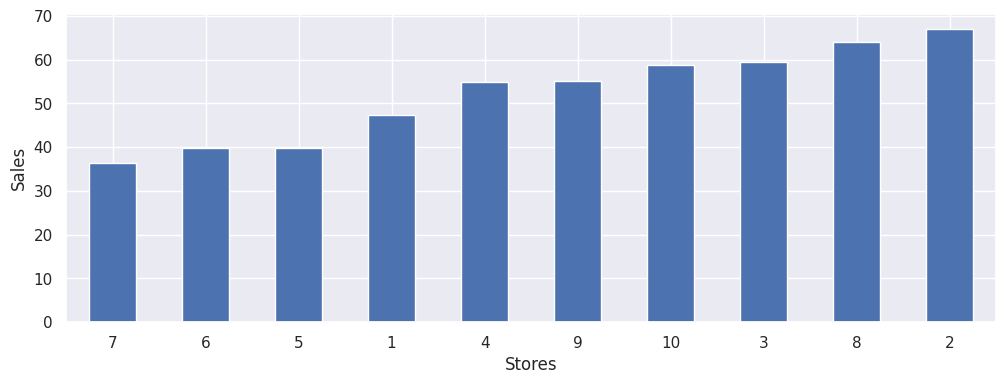

In [42]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby("store")["sales"].mean().sort_values(ascending=True).plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Stores");  # custom x label using Matplotlib
plt.ylabel("Sales");

## Average Sales of Each Item

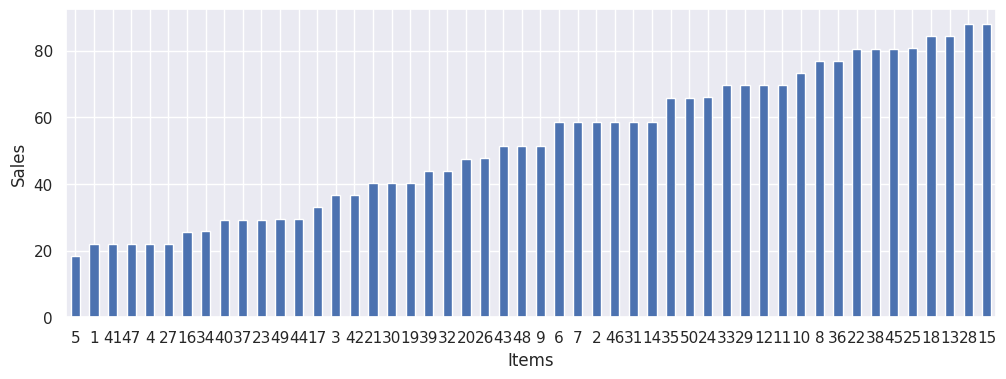

In [43]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby("item")["sales"].mean().sort_values(ascending=True).plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Items");  # custom x label using Matplotlib
plt.ylabel("Sales");

## Feature Engineering
Features to be added are:
1. WEEK DAY(already added During Visualization)
2. month
3. year
4. week sale(rolling sum)
5. month sale(rolling sum)
6. 3 month sale(rolling sum)

## Adding Year and Month

In [44]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [45]:
Train1 = df.copy()
Train1.drop(['date'], axis=1)
Train1

,date,week_days,store,item,sales,year,month
0,2013-01-01,Tuesday,1,1,13,2013,1
1,2013-01-02,Wednesday,1,1,11,2013,1
2,2013-01-03,Thursday,1,1,14,2013,1
3,2013-01-04,Friday,1,1,13,2013,1
4,2013-01-05,Saturday,1,1,10,2013,1
...,...,...,...,...,...,...,...
912995,2017-12-27,Wednesday,10,50,63,2017,12
912996,2017-12-28,Thursday,10,50,59,2017,12
912997,2017-12-29,Friday,10,50,74,2017,12
912998,2017-12-30,Saturday,10,50,62,2017,12


## Rolling sum for 7 Days(week)

In [46]:
df1=df.copy()
df1["rolling_sales_weeks"] = df1['sales'].rolling(window= 7, min_periods=1).sum().astype(int)

## Rolling sum for 1 Month

In [47]:
df1["rolling_sales_months"] = df1['sales'].rolling(window= 30, min_periods=1).sum().astype(int)

## Rolling Sum for 3 Months

In [48]:
df1["rolling_sales_three_months"] = df1['sales'].rolling(window= 90, min_periods=1).sum().astype(int)

In [49]:
df1 = df1[['date', 'week_days', 'year', 'month', 'store', 'item', 'rolling_sales_weeks', 'rolling_sales_months', 'rolling_sales_three_months', 'sales']]
df1.head()

,date,week_days,year,month,store,item,rolling_sales_weeks,rolling_sales_months,rolling_sales_three_months,sales
0,2013-01-01,Tuesday,2013,1,1,1,13,13,13,13
1,2013-01-02,Wednesday,2013,1,1,1,24,24,24,11
2,2013-01-03,Thursday,2013,1,1,1,38,38,38,14
3,2013-01-04,Friday,2013,1,1,1,51,51,51,13
4,2013-01-05,Saturday,2013,1,1,1,61,61,61,10


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date                        913000 non-null  datetime64[ns]
 1   week_days                   913000 non-null  object        
 2   year                        913000 non-null  int64         
 3   month                       913000 non-null  int64         
 4   store                       913000 non-null  int64         
 5   item                        913000 non-null  int64         
 6   rolling_sales_weeks         913000 non-null  int64         
 7   rolling_sales_months        913000 non-null  int64         
 8   rolling_sales_three_months  913000 non-null  int64         
 9   sales                       913000 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 76.6+ MB


In [51]:
df=df1.copy()

## Rolling Sales Week Vs Date

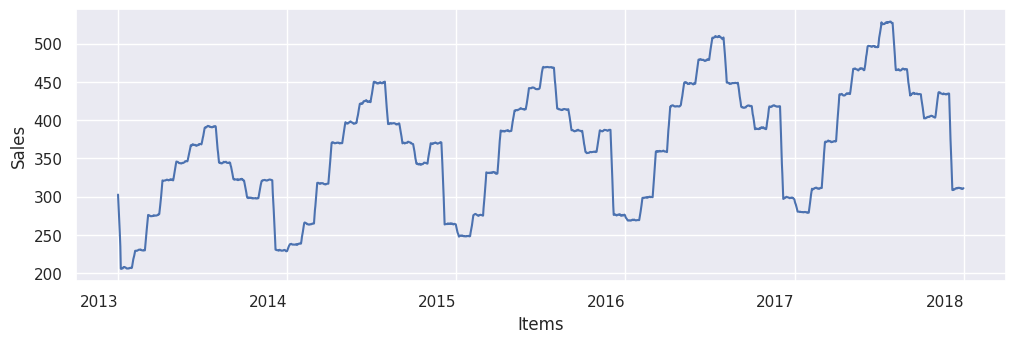

In [52]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby("date")["rolling_sales_weeks"].mean().sort_values(ascending=True).plot(kind='line', rot=0, ax=axs)
plt.xlabel("Items");  # custom x label using Matplotlib
plt.ylabel("Sales");

## Rolling Sales Month Vs Date

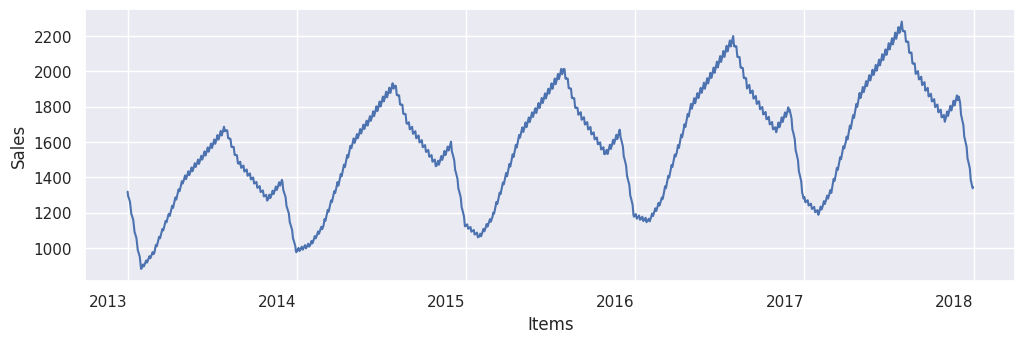

In [53]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby("date")["rolling_sales_months"].mean().sort_values(ascending=True).plot(kind='line', rot=0, ax=axs)
plt.xlabel("Items");  # custom x label using Matplotlib
plt.ylabel("Sales");

## Rolling Sales 3 Month Vs Date

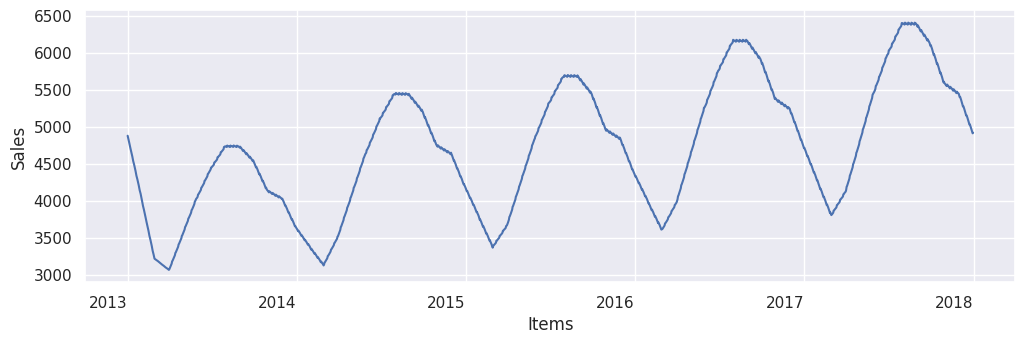

In [54]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby("date")["rolling_sales_three_months"].mean().sort_values(ascending=True).plot(kind='line', rot=0, ax=axs)
plt.xlabel("Items");  # custom x label using Matplotlib
plt.ylabel("Sales");

## Data Preprocessing and Cleaning

In [55]:
df3 = df.copy()
df3 = df3.drop(['date'], axis=1)

## Finding Outliers

In [56]:
def outlierpresence(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  df2 = pd.DataFrame((df < lower_whisker) | (df > upper_whisker ))
  for i in df2.keys():
    flag = True
    if True in df2[i].tolist():
      flag = False
    if flag:
      print('Outliers are', '\033[1m'+ ' not present in the data of' +'\033[0m', '\033[1m' + i + '\033[0m')
    else:
      print('Outliers are', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
outlierpresence(df3)

<ipython-input-56-3c606c8e58f6>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-56-3c606c8e58f6>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-56-3c606c8e58f6>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = pd.DataFrame((df < lower_whisker) | (df > upper_whisker ))


Outliers are  not present in the data of item
Outliers are  not present in the data of month
Outliers are present in the data of rolling_sales_months
Outliers are present in the data of rolling_sales_three_months
Outliers are present in the data of rolling_sales_weeks
Outliers are present in the data of sales
Outliers are  not present in the data of store
Outliers are  not present in the data of week_days
Outliers are  not present in the data of year


In [57]:
def find_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 - (whisker_width * IQR)
    upper_whisker = Q3 + (whisker_width * IQR)

    outliers_present = ((df < lower_whisker) | (df > upper_whisker)).sum()

    for i, count in outliers_present.items():
        if count > 0:
            print('\033[1m' + i + '\033[0m')
            print('-------------------------')
            print("Total number of outliers is", count)
            print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
find_outliers(df3)


<ipython-input-57-e079c6057261>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-57-e079c6057261>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-57-e079c6057261>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_present = ((df < lower_whisker) | (df > upper_whisker)).sum()


rolling_sales_months
-------------------------
Total number of outliers is 6577
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
rolling_sales_three_months
-------------------------
Total number of outliers is 5663
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
rolling_sales_weeks
-------------------------
Total number of outliers is 7004
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sales
-------------------------
Total number of outliers is 11967
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


## EDA 2

<ipython-input-58-c0d8621247ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = '.2%')


<Axes: >

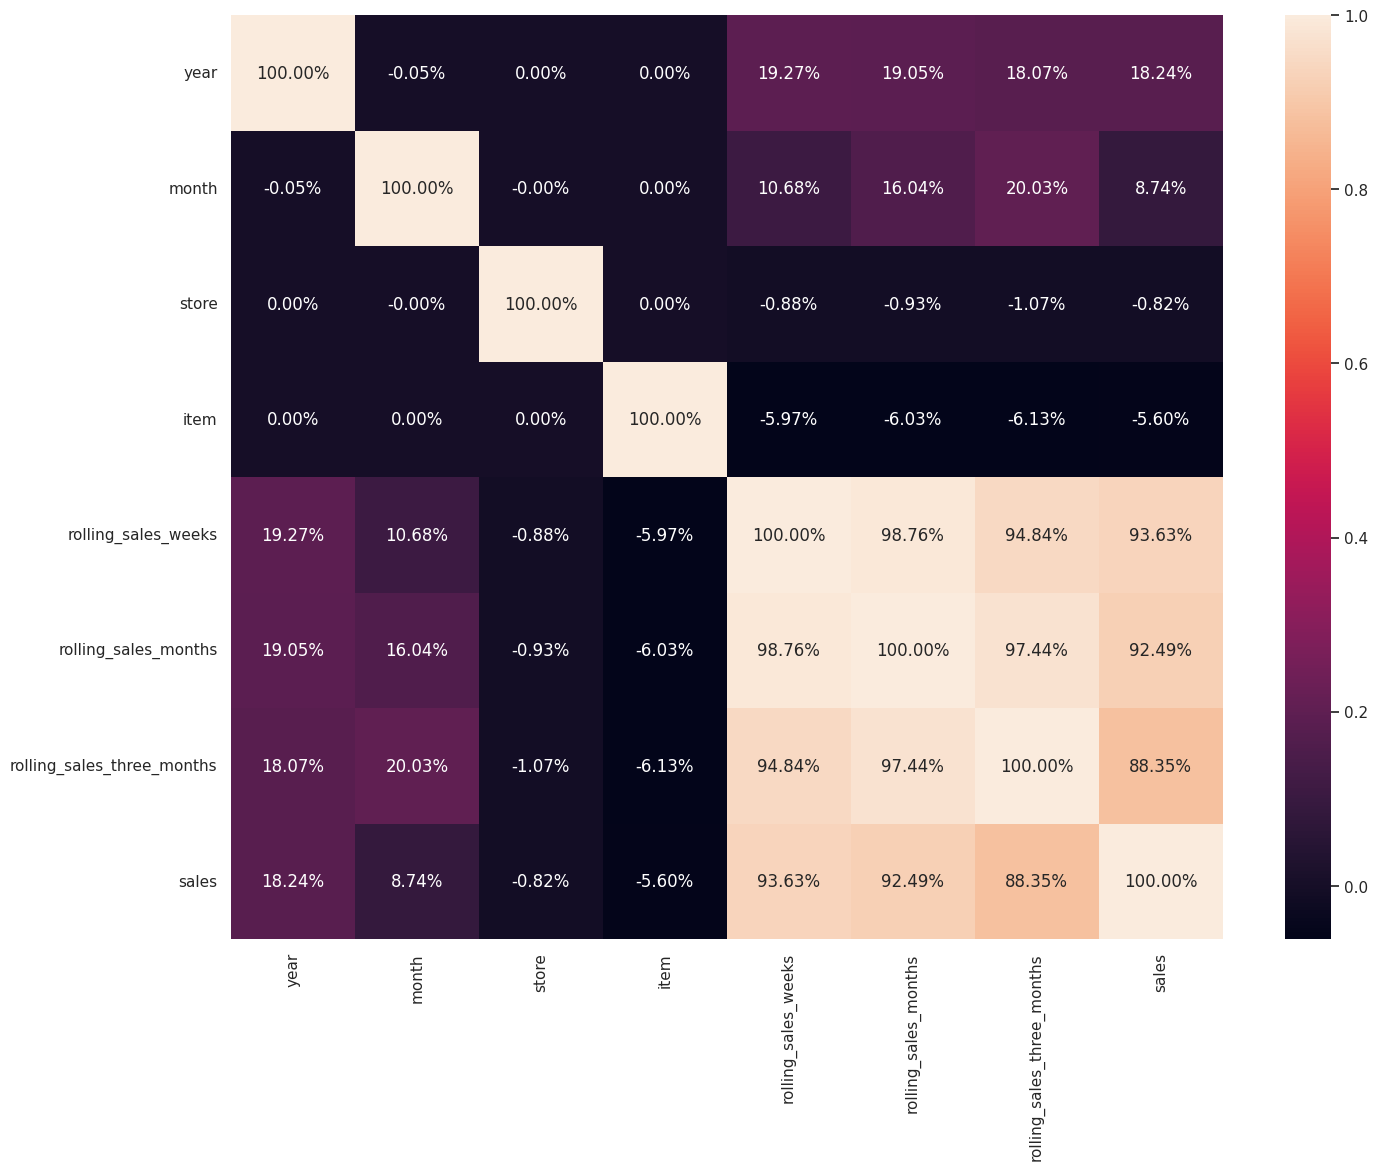

In [58]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

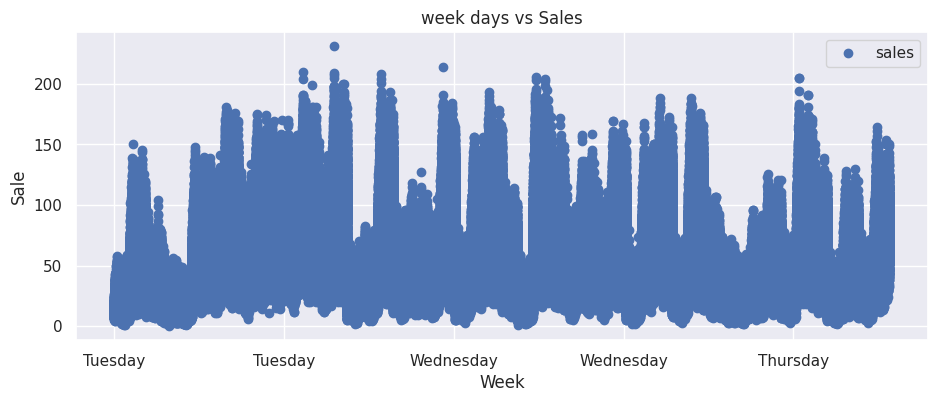

In [59]:
df.plot(x='week_days', y='sales', style='o')
plt.title('week days vs Sales')
plt.xlabel('Week')
plt.ylabel('Sale')
plt.show()

In [60]:
df[['week_days', 'sales']].corr()

<ipython-input-60-bdcf49f24097>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['week_days', 'sales']].corr()


,sales
sales,1.0


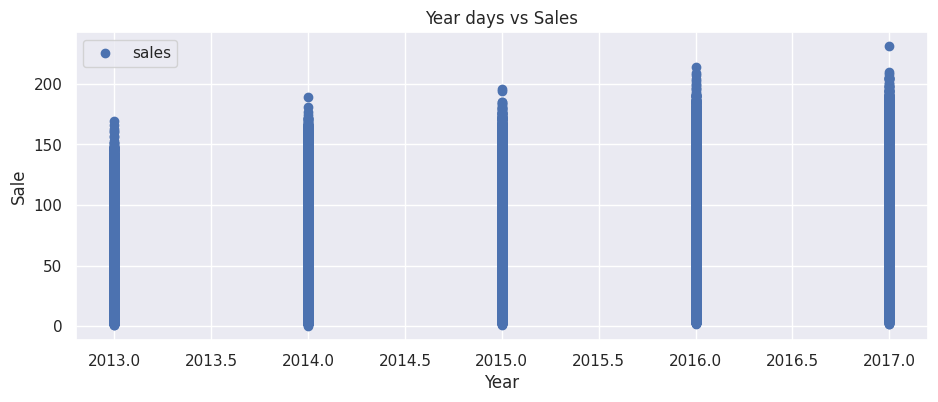

In [61]:
df.plot(x='year', y='sales', style='o')
plt.title('Year days vs Sales')
plt.xlabel('Year')
plt.ylabel('Sale')
plt.show()

In [62]:
df[['year', 'sales']].corr()

,year,sales
year,1.00000,0.18236
sales,0.18236,1.00000


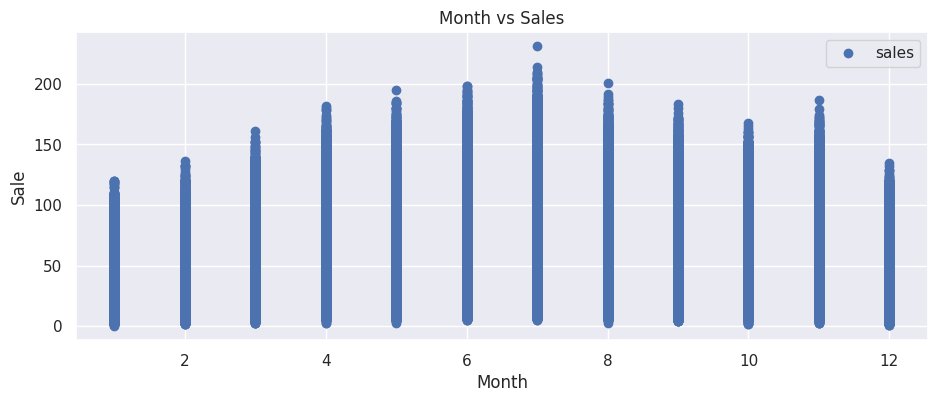

In [63]:
df.plot(x='month', y='sales', style='o')
plt.title('Month vs Sales')
plt.xlabel('Month')
plt.ylabel('Sale')
plt.show()

In [64]:
df[['month', 'sales']].corr()

,month,sales
month,1.000000,0.087414
sales,0.087414,1.000000


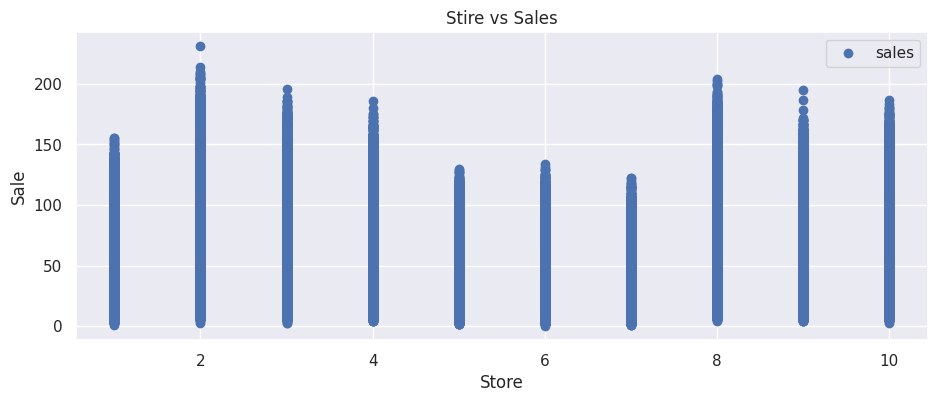

In [65]:
df.plot(x='store', y='sales', style='o')
plt.title('Stire vs Sales')
plt.xlabel('Store')
plt.ylabel('Sale')
plt.show()

In [66]:
df[['store', 'sales']].corr()

,store,sales
store,1.00000,-0.00817
sales,-0.00817,1.00000


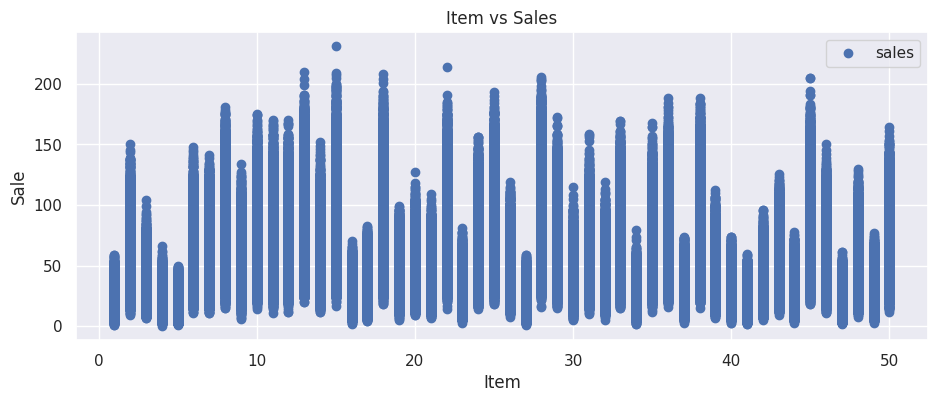

In [67]:
df.plot(x='item', y='sales', style='o')
plt.title('Item vs Sales')
plt.xlabel('Item')
plt.ylabel('Sale')
plt.show()

In [68]:
df[['item', 'sales']].corr()

,item,sales
item,1.000000,-0.055998
sales,-0.055998,1.000000


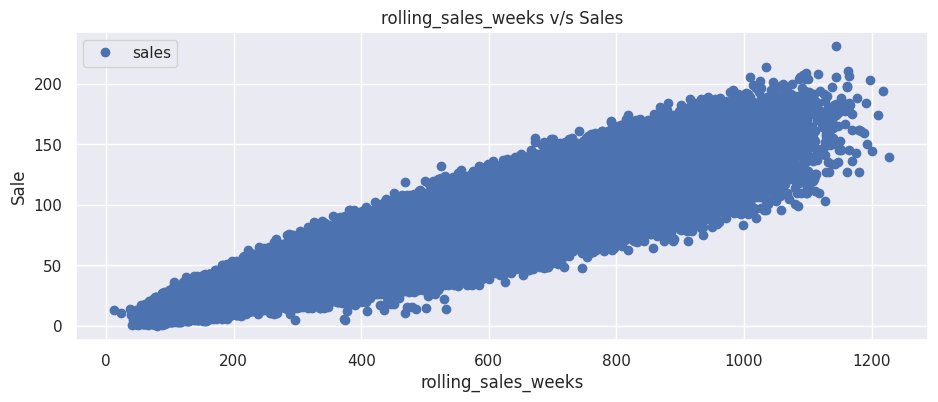

In [69]:
df.plot(x='rolling_sales_weeks', y='sales', style='o')
plt.title('rolling_sales_weeks v/s Sales')
plt.xlabel('rolling_sales_weeks')
plt.ylabel('Sale')
plt.show()

In [70]:
df[['rolling_sales_weeks', 'sales']].corr()

,rolling_sales_weeks,sales
rolling_sales_weeks,1.0000,0.9363
sales,0.9363,1.0000


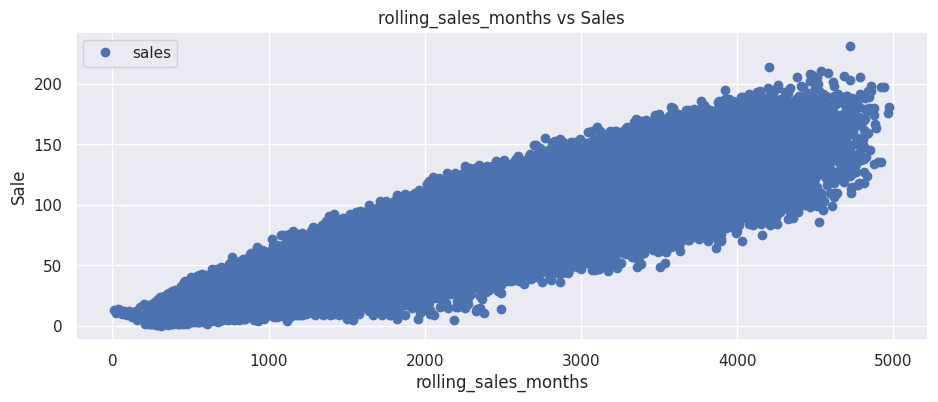

In [71]:
df.plot(x='rolling_sales_months', y='sales', style='o')
plt.title('rolling_sales_months vs Sales')
plt.xlabel('rolling_sales_months')
plt.ylabel('Sale')
plt.show()

In [72]:
df[['rolling_sales_months', 'sales']].corr()

,rolling_sales_months,sales
rolling_sales_months,1.000000,0.924884
sales,0.924884,1.000000


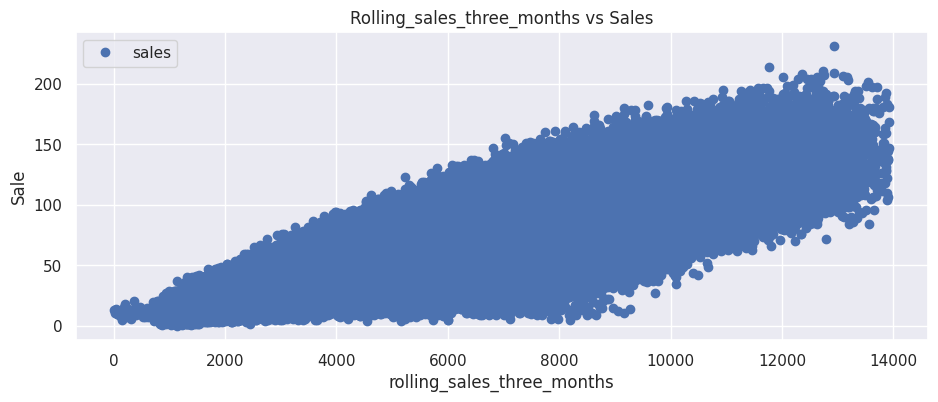

In [73]:
df.plot(x='rolling_sales_three_months', y='sales', style='o')
plt.title('Rolling_sales_three_months vs Sales')
plt.xlabel('rolling_sales_three_months')
plt.ylabel('Sale')
plt.show()

In [74]:
df[['rolling_sales_three_months', 'sales']].corr()

,rolling_sales_three_months,sales
rolling_sales_three_months,1.000000,0.883542
sales,0.883542,1.000000


In [75]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['date', 'week_days', 'year', 'month', 'store', 'item', 'rolling_sales_weeks', 'rolling_sales_months', 'rolling_sales_three_months', 'sales']


In [76]:
df["week_days"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [77]:
df_main = df.copy()

## Encoding

In [78]:
a ={"Monday" : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4, 'Saturday' : 5, 'Sunday': 6}
e = {7:1, 6: 3, 5:4, 1:7, 4:11, 9:12, 10:15, 3:16, 8:19, 2:21}
c = {1:1, 12:3, 2:4, 3:8, 10:10, 9:12, 4:13, 11:14, 8:17, 5:18, 6:21, 7:24}
d = {5:1, 1:4, 41:5, 47:6, 4:7, 27:8, 16:11, 34:12, 40:16, 37:17, 23: 18, 49:19 \
     , 44:20, 17:23, 3:26, 42:27, 21:30, 30:31, 19:32, 39:35, 32:36, 20:39, 26:40, 43:43, 48:44, 9:45, 6:49\
     , 7:50, 2:51, 46:52, 31:53, 14:54, 35:59, 50:60, 24:61, 33:63, 29:64, 12:65, 11:66, 10:68, 8:70, 36:71, 22:73, 38:74\
     , 45:75, 25:76, 18:78, 13:79, 28:82, 15:83}
df['week_days'] = df['week_days'].map(a)
df['store'] = df['store'].map(e)
df['month'] = df['month'].map(c)
df['item'] = df['item'].map(d)
df['year'] = (df['year']-2013)+1

In [79]:
df.head()

,date,week_days,year,month,store,item,rolling_sales_weeks,rolling_sales_months,rolling_sales_three_months,sales
0,2013-01-01,1,1,1,7,4,13,13,13,13
1,2013-01-02,2,1,1,7,4,24,24,24,11
2,2013-01-03,3,1,1,7,4,38,38,38,14
3,2013-01-04,4,1,1,7,4,51,51,51,13
4,2013-01-05,5,1,1,7,4,61,61,61,10


## Splitting the Data

In [80]:
split_date = '2017-09-30'
train = df.loc[df['date'] <= split_date]
test = df.loc[df['date'] > split_date]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (867000, 10)
Test Dataset: (46000, 10)


In [81]:
b = []
for i in train.keys():
  b.append(i)
print(b)

['date', 'week_days', 'year', 'month', 'store', 'item', 'rolling_sales_weeks', 'rolling_sales_months', 'rolling_sales_three_months', 'sales']


In [82]:
# We want to remove target varible 'sales' and unnecessary column date.
b.remove('sales')
b.remove('date')
print(b)

['week_days', 'year', 'month', 'store', 'item', 'rolling_sales_weeks', 'rolling_sales_months', 'rolling_sales_three_months']


In [83]:
# forecast_dataforecast_data We are going to define the variable and the target sets for both the test and train datas.
X_train = train[b].values
X_test = test[b].values
y_train = train['sales'].values
y_test = test['sales'].values

## Standarization

In [84]:
from sklearn.preprocessing import StandardScaler ## standrard scalig
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data


## Modelling
```



In [85]:
forecast_data = pd.MultiIndex.from_product([
    pd.date_range(start='2018-01-01', end='2018-03-31', freq='D'),
    [i+1 for i in range(10)],
    [i+1 for i in range(50)]], names=['date', 'store', 'item']).to_frame(index=False)
forecast_data['week_days'] = forecast_data['date'].dt.day_name()
forecast_data['year'] = forecast_data['date'].dt.year
forecast_data['month'] = forecast_data['date'].dt.month
forecast_datan = forecast_data.copy()
a ={"Monday" : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4, 'Saturday' : 5, 'Sunday': 6}
e = {7:1, 6: 3, 5:4, 1:7, 4:11, 9:12, 10:15, 3:16, 8:19, 2:21}
c = {1:1, 12:3, 2:4, 3:8, 10:10, 9:12, 4:13, 11:14, 8:17, 5:18, 6:21, 7:24}
d = {5:1, 1:4, 41:5, 47:6, 4:7, 27:8, 16:11, 34:12, 40:16, 37:17, 23: 18, 49:19 \
     , 44:20, 17:23, 3:26, 42:27, 21:30, 30:31, 19:32, 39:35, 32:36, 20:39, 26:40, 43:43, 48:44, 9:45, 6:49\
     , 7:50, 2:51, 46:52, 31:53, 14:54, 35:59, 50:60, 24:61, 33:63, 29:64, 12:65, 11:66, 10:68, 8:70, 36:71, 22:73, 38:74\
     , 45:75, 25:76, 18:78, 13:79, 28:82, 15:83}
forecast_data['week_days'] = forecast_data['week_days'].map(a)
forecast_data['store'] = forecast_data['store'].map(e)
forecast_data['month'] = forecast_data['month'].map(c)
forecast_data['item'] = forecast_data['item'].map(d)
forecast_data['year'] = (forecast_data['year']-2013)+1
forecast_data = forecast_data[['date', 'week_days', 'year', 'month', 'store', 'item']]

##Forecast the demand for 3 months from 2018-01-01 to 2018-03-31(NEW)


In [86]:
forecast_data1 = forecast_data.copy()

In [87]:
forecast_data1.drop(forecast_data.columns[[0]], axis=1, inplace=True)
forecast_data1

,week_days,year,month,store,item
0,0,6,1,7,4
1,0,6,1,7,51
2,0,6,1,7,26
3,0,6,1,7,7
4,0,6,1,7,1
...,...,...,...,...,...
44995,5,6,8,15,52
44996,5,6,8,15,6
44997,5,6,8,15,44
44998,5,6,8,15,19


In [88]:
forecast_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   week_days  45000 non-null  int64
 1   year       45000 non-null  int64
 2   month      45000 non-null  int64
 3   store      45000 non-null  int64
 4   item       45000 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [89]:
Forecast_data_val = forecast_data1.values

In [90]:
b

['week_days',
 'year',
 'month',
 'store',
 'item',
 'rolling_sales_weeks',
 'rolling_sales_months',
 'rolling_sales_three_months']

In [91]:
# We want to remove 3 FEATURES FROM THE SET.
b.remove('rolling_sales_weeks')
b.remove('rolling_sales_months')
b.remove('rolling_sales_three_months')
print(b)

['week_days', 'year', 'month', 'store', 'item']


In [92]:
# forecast_dataforecast_data We are going to define the variable and the target sets for both the test and train datas.
X_train = train[b].values
X_test = test[b].values
y_train = train['sales'].values
y_test = test['sales'].values

In [93]:
from sklearn.preprocessing import StandardScaler ## standrard scalig
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data

## Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [95]:
coeff_df = pd.DataFrame(regressor.coef_,[b], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
week_days,6.387831
year,5.149460
month,9.438346
store,10.197625
item,21.198325


In [96]:
print(y_pred)

[26.49810401  7.32078279 10.51700299 ... 71.37043519 74.56665539
 77.7628756 ]


In [97]:
df_pred = pd.DataFrame({'date': test['date'], 'Actual': y_test, 'Predicted': y_pred})
df_pred['Predicted'] = df_pred['Predicted'].round().astype(int)
df_pred.head(3)

,date,Actual,Predicted
1734,2017-10-01,21,26
1735,2017-10-02,12,7
1736,2017-10-03,18,11


In [98]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.867213731434604


## Feature Selection

In [99]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
sorted(list(zip(selector.ranking_,b)))

[(1, 'item'), (1, 'month'), (1, 'store'), (2, 'week_days'), (3, 'year')]

In [100]:
Actual_pred = df_pred.groupby(df_pred["date"].dt.date)["Actual"].sum()
Predicted_pred = df_pred.groupby(df_pred["date"].dt.date)["Predicted"].sum()
df_pred1 = pd.DataFrame({'Actual': Actual_pred, 'Predicted': Predicted_pred})
date_pred = df_pred1.index.values.tolist()
df_pred1['date'] = date_pred
df_pred1.head(3)

,Actual,Predicted,date
date,,,
2017-10-01,33845,33272,2017-10-01
2017-10-02,22913,23680,2017-10-02
2017-10-03,26854,25281,2017-10-03


In [101]:
df_pred1['Predicted'].sum()-df_pred1['Actual'].sum()

44104

In [102]:
if (df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())<0:
  print("we have",((df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())/df_pred1['Predicted'].sum())*(-100), "% of opportunity lost will happen by this model.")
else:
  print("we have",((df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())/df_pred1['Predicted'].sum())*(100), "% of items will not sale by this model.")

we have 1.7233032375234978 % of items will not sale by this model.


In [103]:
fig = px.line(df_pred1, x='date', y=["Actual","Predicted"])
fig.show()

In [104]:
k1 = pd.DataFrame(train.groupby(['month']).get_group(10))
k1 = pd.DataFrame(train.groupby(['month']).get_group(14)).append(k1)
k1 = pd.DataFrame(train.groupby(['month']).get_group(3)).append(k1)
sales_pred = k1.groupby(k1["date"].dt.date)["sales"].sum()
df_pred2 = pd.DataFrame({'sales': sales_pred})
df_pred2
date_pred2 = df_pred2.index.values.tolist()
df_pred2['date'] = date_pred2
df_pred2 = df_pred2[['date', 'sales']]
df_pred3 = df_pred1[['date', 'Predicted']]
df_pred3 = df_pred3.rename(columns={'Predicted': 'sales'})
k = df_pred2.append(df_pred3)
k['date'] = pd.to_datetime(k['date'],format = "%Y-%m-%d")
k.head(3)

<ipython-input-104-e5e89c0513b4>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-104-e5e89c0513b4>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-104-e5e89c0513b4>:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,date,sales
date,,
2013-10-01,2013-10-01,19640
2013-10-02,2013-10-02,19853
2013-10-03,2013-10-03,21059


In [105]:
fig = px.line(k, x='date', y='sales')
fig.show()

<Axes: xlabel='year', ylabel='sales'>

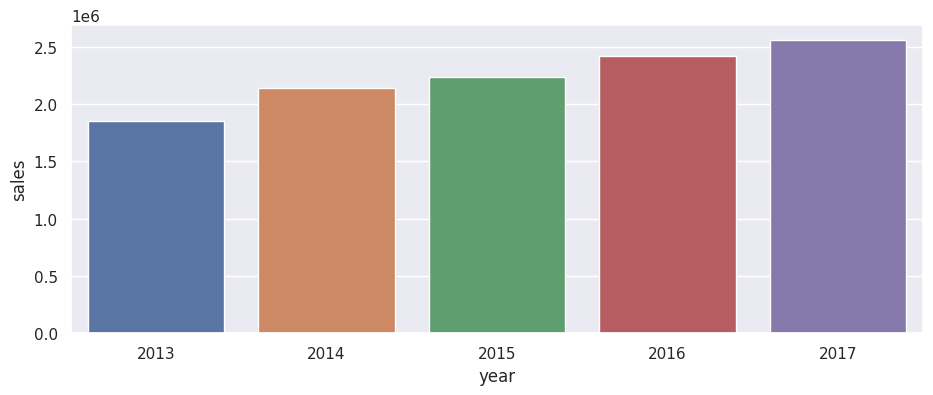

In [106]:
m = k.groupby(k['date'].dt.year)['sales'].sum()
m = pd.DataFrame(m)
date_m = m.index.values.tolist()
m['year'] = date_m
m = m[['year', 'sales']]
sns.barplot(data=m, x="year", y="sales")

## Random Forest Model

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 20, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)
r2_score(y_pred, y_test)

0.9130260732112947

In [108]:
print(y_pred)

[26.2463153  17.70864286 18.79812698 ... 66.37092857 70.06847835
 66.41675685]


In [109]:
df_pred = pd.DataFrame({'date': test['date'], 'Actual': y_test, 'Predicted': y_pred})
df_pred['Predicted'] = df_pred['Predicted'].round().astype(int)
df_pred.head(3)

,date,Actual,Predicted
1734,2017-10-01,21,26
1735,2017-10-02,12,18
1736,2017-10-03,18,19


In [110]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9208314831890025


## Feature Selection

In [111]:
from sklearn import tree

In [112]:
# Import necessary libraries
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth=3)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file='small_tree.dot', feature_names=b, rounded=True, precision=1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

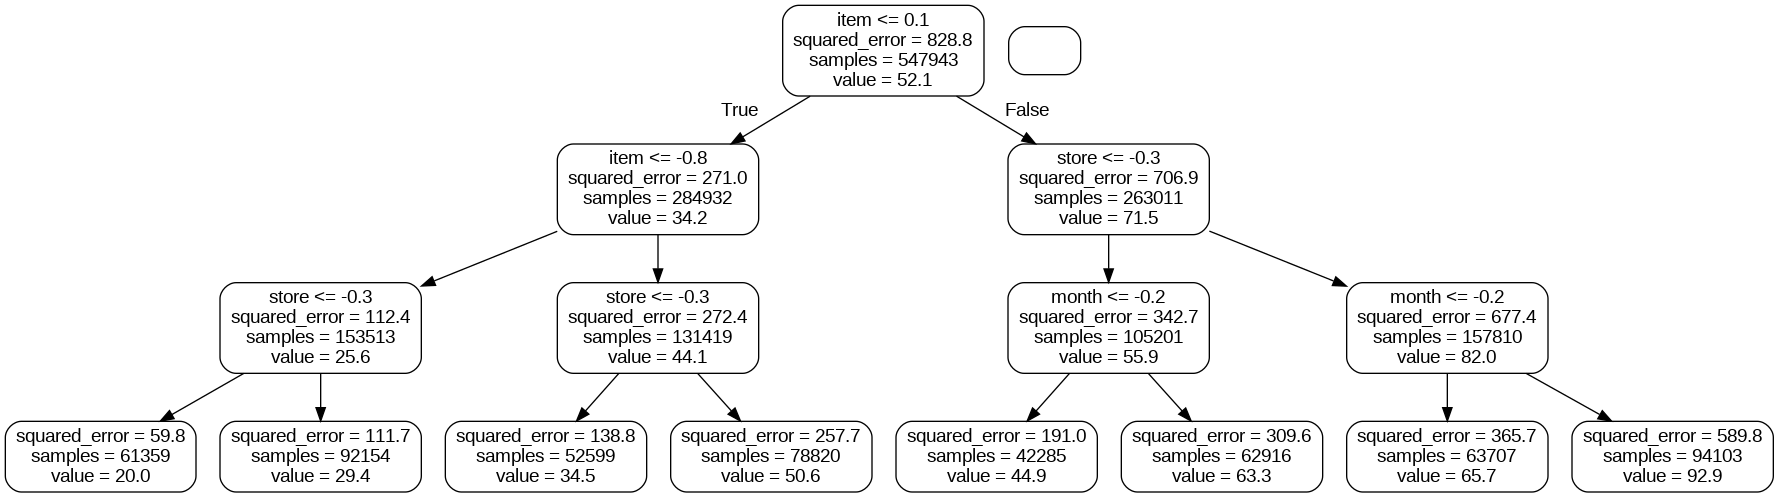

In [113]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(b, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: item                 Importance: 0.6
Variable: store                Importance: 0.15
Variable: month                Importance: 0.14
Variable: week_days            Importance: 0.07
Variable: year                 Importance: 0.05


In [114]:
Actual_pred = df_pred.groupby(df_pred["date"].dt.date)["Actual"].sum()
Predicted_pred = df_pred.groupby(df_pred["date"].dt.date)["Predicted"].sum()
df_pred1 = pd.DataFrame({'Actual': Actual_pred, 'Predicted': Predicted_pred})
date_pred = df_pred1.index.values.tolist()
df_pred1['date'] = date_pred
df_pred1.head(3)

,Actual,Predicted,date
date,,,
2017-10-01,33845,33418,2017-10-01
2017-10-02,22913,22119,2017-10-02
2017-10-03,26854,25933,2017-10-03


In [115]:
df_pred1['Predicted'].sum()-df_pred1['Actual'].sum()

-44401

In [116]:
if (df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())<0:
  print("we have",((df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())/df_pred1['Predicted'].sum())*(-100), "% of opportunity lost will happen by this model.")
else:
  print("we have",((df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())/df_pred1['Predicted'].sum())*(100), "% of items will not sale by this model.")

we have 1.7970540310171017 % of opportunity lost will happen by this model.


In [117]:
fig = px.line(df_pred1, x='date', y=["Actual","Predicted"])
fig.show()

In [118]:
#Adding predicted data with test for plotting
k1 = pd.DataFrame(train.groupby(['month']).get_group(10))
k1 = pd.DataFrame(train.groupby(['month']).get_group(14)).append(k1)
k1 = pd.DataFrame(train.groupby(['month']).get_group(3)).append(k1)
sales_pred = k1.groupby(k1["date"].dt.date)["sales"].sum()
df_pred2 = pd.DataFrame({'sales': sales_pred})
df_pred2
date_pred2 = df_pred2.index.values.tolist()
df_pred2['date'] = date_pred2
df_pred2 = df_pred2[['date', 'sales']]
df_pred3 = df_pred1[['date', 'Predicted']]
df_pred3 = df_pred3.rename(columns={'Predicted': 'sales'})
k = df_pred2.append(df_pred3)
k['date'] = pd.to_datetime(k['date'],format = "%Y-%m-%d")
k.head(3)

<ipython-input-118-8b3169915b07>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-118-8b3169915b07>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-118-8b3169915b07>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,date,sales
date,,
2013-10-01,2013-10-01,19640
2013-10-02,2013-10-02,19853
2013-10-03,2013-10-03,21059


In [119]:
fig = px.line(k, x='date', y='sales')
fig.show()

In [120]:
y_pred= rf.predict(Forecast_data_val)

In [121]:
forecast_data['Predicted'] = y_pred.astype(int)

In [122]:
forecast_data.head(3)

,date,week_days,year,month,store,item,Predicted
0,2018-01-01,0,6,1,7,4,143
1,2018-01-01,0,6,1,7,51,143
2,2018-01-01,0,6,1,7,26,143


In [123]:
Predicted_pred = forecast_data.groupby(forecast_data["date"].dt.date)["Predicted"].sum()
df_pred1 = pd.DataFrame({'Predicted': Predicted_pred})
df_pred1
date_pred = df_pred1.index.values.tolist()
df_pred1['date'] = date_pred
df_pred1.head(3)

,Predicted,date
date,,
2018-01-01,70594,2018-01-01
2018-01-02,81584,2018-01-02
2018-01-03,79948,2018-01-03


In [124]:
fig = px.line(df_pred1, x='date', y=["Predicted"])
fig.show()

In [125]:
forecast_datan['Predicted'] = y_pred.astype(int)
forecast_datan


,date,store,item,week_days,year,month,Predicted
0,2018-01-01,1,1,Monday,2018,1,143
1,2018-01-01,1,2,Monday,2018,1,143
2,2018-01-01,1,3,Monday,2018,1,143
3,2018-01-01,1,4,Monday,2018,1,143
4,2018-01-01,1,5,Monday,2018,1,117
...,...,...,...,...,...,...,...
44995,2018-03-31,10,46,Saturday,2018,3,201
44996,2018-03-31,10,47,Saturday,2018,3,201
44997,2018-03-31,10,48,Saturday,2018,3,201
44998,2018-03-31,10,49,Saturday,2018,3,201


In [126]:
ITEMS = forecast_datan['item'].unique().tolist()
for i in ITEMS:
  print("For the item", i)
  print('%%%%%%%%%%%%%%%%%%%')
  print(forecast_datan[forecast_datan['item']== i].groupby('month').Predicted.sum())
  print('------------------------------------------------')

For the item 1
%%%%%%%%%%%%%%%%%%%
month
1    48917
2    52644
3    58572
Name: Predicted, dtype: int64
------------------------------------------------
For the item 2
%%%%%%%%%%%%%%%%%%%
month
1    48917
2    52644
3    58572
Name: Predicted, dtype: int64
------------------------------------------------
For the item 3
%%%%%%%%%%%%%%%%%%%
month
1    48917
2    52644
3    58572
Name: Predicted, dtype: int64
------------------------------------------------
For the item 4
%%%%%%%%%%%%%%%%%%%
month
1    48917
2    52644
3    58572
Name: Predicted, dtype: int64
------------------------------------------------
For the item 5
%%%%%%%%%%%%%%%%%%%
month
1    42865
2    42360
3    46989
Name: Predicted, dtype: int64
------------------------------------------------
For the item 6
%%%%%%%%%%%%%%%%%%%
month
1    48917
2    52644
3    58572
Name: Predicted, dtype: int64
------------------------------------------------
For the item 7
%%%%%%%%%%%%%%%%%%%
month
1    48917
2    52644
3    58572
Name: Pr

## XGBoost Model

In [127]:
import xgboost as xgb
model = xgb.XGBRegressor(learning_rate = 0.15, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

0.9306859917139295

In [128]:
y_pred= model.predict(X_test)

In [129]:
print(y_pred)

[26.152521 18.08411  21.227823 ... 66.690254 70.88106  73.74859 ]


In [130]:
df_pred = pd.DataFrame({'date': test['date'], 'Actual': y_test, 'Predicted': y_pred})
df_pred['Predicted'] = df_pred['Predicted'].round().astype(int)
df_pred

,date,Actual,Predicted
1734,2017-10-01,21,26
1735,2017-10-02,12,18
1736,2017-10-03,18,21
1737,2017-10-04,15,21
1738,2017-10-05,20,22
...,...,...,...
912995,2017-12-27,63,58
912996,2017-12-28,59,63
912997,2017-12-29,74,67
912998,2017-12-30,62,71


In [131]:
sum(y_pred)

2506738.786971092

In [132]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9306859917139295


In [133]:
actual_pred = df_pred.groupby(df_pred["date"].dt.date)["Actual"].sum()
Predicted_pred = df_pred.groupby(df_pred["date"].dt.date)["Predicted"].sum()
df_pred1 = pd.DataFrame({'Actual': Actual_pred, 'Predicted': Predicted_pred})
date_pred = df_pred1.index.values.tolist()
df_pred1['date'] = date_pred
df_pred1.head(3)

,Actual,Predicted,date
date,,,
2017-10-01,33845,34117,2017-10-01
2017-10-02,22913,22804,2017-10-02
2017-10-03,26854,26553,2017-10-03


In [134]:
df_pred1['Predicted'].sum()-df_pred1['Actual'].sum()

-8488

In [135]:
if (df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())<0:
  print("we have",((df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())/df_pred1['Predicted'].sum())*(-100), "% of opportunity lost will happen by this model.")
else:
  print("we have",((df_pred1['Predicted'].sum()-df_pred1['Actual'].sum())/df_pred1['Predicted'].sum())*(100), "% of items will not sale by this model.")

we have 0.33861535521700226 % of opportunity lost will happen by this model.


In [136]:
fig = px.line(df_pred1, x='date', y=["Actual","Predicted"])
fig.show()

In [137]:
k1 = pd.DataFrame(train.groupby(['month']).get_group(10))
k1 = pd.DataFrame(train.groupby(['month']).get_group(14)).append(k1)
k1 = pd.DataFrame(train.groupby(['month']).get_group(17)).append(k1)
sales_pred = k1.groupby(k1["date"].dt.date)["sales"].sum()
df_pred2 = pd.DataFrame({'sales': sales_pred})
df_pred2
date_pred2 = df_pred2.index.values.tolist()
df_pred2['date'] = date_pred2
df_pred2 = df_pred2[['date', 'sales']]
df_pred3 = df_pred1[['date', 'Predicted']]
df_pred3 = df_pred3.rename(columns={'Predicted': 'sales'})
k = df_pred2.append(df_pred3)
k['date'] = pd.to_datetime(k['date'],format = "%Y-%m-%d")
k.head(3)

<ipython-input-137-1c0397cb1978>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-137-1c0397cb1978>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-137-1c0397cb1978>:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,date,sales
date,,
2013-08-01,2013-08-01,24052
2013-08-02,2013-08-02,26159
2013-08-03,2013-08-03,27866


In [138]:
fig = px.line(k, x='date', y='sales')
fig.show()

In [139]:
y_pred= model.predict(Forecast_data_val)

In [140]:
forecast_data['Predicted'] = y_pred.astype(int)

In [141]:
forecast_data.head(3)

,date,week_days,year,month,store,item,Predicted
0,2018-01-01,0,6,1,7,4,142
1,2018-01-01,0,6,1,7,51,142
2,2018-01-01,0,6,1,7,26,142


In [142]:
Predicted_pred = forecast_data.groupby(forecast_data["date"].dt.date)["Predicted"].sum()
df_pred1 = pd.DataFrame({'Predicted': Predicted_pred})
df_pred1
date_pred = df_pred1.index.values.tolist()
df_pred1['date'] = date_pred
df_pred1.head(3)

,Predicted,date
date,,
2018-01-01,69902,2018-01-01
2018-01-02,73411,2018-01-02
2018-01-03,83156,2018-01-03


In [143]:
fig = px.line(df_pred1, x='date', y=["Predicted"])
fig.show()

In [144]:
forecast_datan['Predicted'] = y_pred.astype(int)
forecast_datan.head(3)

,date,store,item,week_days,year,month,Predicted
0,2018-01-01,1,1,Monday,2018,1,142
1,2018-01-01,1,2,Monday,2018,1,142
2,2018-01-01,1,3,Monday,2018,1,142


In [145]:
ITEMS = forecast_datan['item'].unique().tolist()
for i in ITEMS:
  print("For the item", i)
  print('%%%%%%%%%%%%%%%%%%%')
  print(forecast_datan[forecast_datan['item']== i].groupby('month').Predicted.sum())
  print('------------------------------------------------')

For the item 1
%%%%%%%%%%%%%%%%%%%
month
1    49460
2    51156
3    56853
Name: Predicted, dtype: int64
------------------------------------------------
For the item 2
%%%%%%%%%%%%%%%%%%%
month
1    49460
2    51156
3    56853
Name: Predicted, dtype: int64
------------------------------------------------
For the item 3
%%%%%%%%%%%%%%%%%%%
month
1    49460
2    51156
3    56853
Name: Predicted, dtype: int64
------------------------------------------------
For the item 4
%%%%%%%%%%%%%%%%%%%
month
1    49460
2    51156
3    56853
Name: Predicted, dtype: int64
------------------------------------------------
For the item 5
%%%%%%%%%%%%%%%%%%%
month
1    39301
2    40684
3    45226
Name: Predicted, dtype: int64
------------------------------------------------
For the item 6
%%%%%%%%%%%%%%%%%%%
month
1    49460
2    51156
3    56853
Name: Predicted, dtype: int64
------------------------------------------------
For the item 7
%%%%%%%%%%%%%%%%%%%
month
1    49460
2    51156
3    56853
Name: Pr

**Conclusion:**

 The XGBoost has given low variance from Actual to Predicted and High Accuracy. So, We can take XGBoost Model for Demand Forcasting

---

